# TransJakarta Consumer Insight & Behavior Analysis
### Capstone Project – Module 3: Business Data Analyst Bootcamp (Purwadhika)
#### Author: Savira Joseph
#### Dataset: TransJakarta  Transaction Data


### Background

    TransJakarta merupakan sistem transportasi publik berbasis bus terbesar di Indonesia. Dengan jutaan transaksi setiap bulannya, data perjalanan pelanggan dapat memberikan insight yang kaya untuk memahami **perilaku pengguna, preferensi waktu, serta demografi penumpang**.

Sebagai seorang **Data Analyst (Marketing Department)**, tujuan dari analisis ini adalah untuk:
- Memahami pola perjalanan pengguna berdasarkan **demografi dan perilaku tap in/out**
- Mengidentifikasi **segmen pengguna potensial**
- Memberikan rekomendasi strategis bagi tim **Marketing dan Partnership** untuk meningkatkan engagement & retensi pelanggan


### Business Questions

1. Bagaimana profil demografis pengguna TransJakarta (usia & jenis kelamin)?
2. Pada jam dan hari apa pengguna TransJakarta paling aktif melakukan perjalanan?
3. Koridor mana yang paling banyak digunakan oleh kelompok usia/gender tertentu?
4. Seberapa lama rata-rata durasi perjalanan dan bagaimana hubungannya dengan tarif?
5. Apa insight yang dapat digunakan untuk strategi marketing & loyalty program?


### Data Understanding

Dataset ini berisi data transaksi perjalanan pengguna TransJakarta dengan detail sebagai berikut:

| Column | Description |
|--------|--------------|
| transID | Unique transaction ID |
| payCardID | Customer card identifier |
| payCardBank | Issuer bank |
| payCardName | Embedded name in card |
| payCardSex | Gender |
| payCardBirthDate | Year of birth |
| corridorID | Route ID |
| corridorName | Route name (Start - End) |
| direction | 0 = Go, 1 = Back |
| tapInStopsName | Name of tap in stop |
| tapOutStopsName | Name of tap out stop |
| tapInTime | DateTime of tap in |
| tapOutTime | DateTime of tap out |
| payAmount | Amount paid by user |


### Import Libraries & Load Data Set    

In [6]:
# Data manipulation
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Date & time
from datetime import datetime

# Display options
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:,.2f}'.format)

# Load Dataset
df = pd.read_csv('Transjakarta.csv')
display(df.head())
display(df.tail())


,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,tapInStopsName,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.00,P00142,Pal Putih,-6.18,106.84,7,2023-04-03 05:21:44,P00253,Tegalan,-6.20,106.86,12.00,2023-04-03 06:00:53,"3,500.00"
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.00,B01963P,Kemenkes 2,-6.23,106.83,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.22,106.82,21.00,2023-04-03 06:40:01,"3,500.00"
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.00,B00499P,Gg. Kunir II,-6.13,106.81,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.13,106.81,39.00,2023-04-03 06:50:55,"3,500.00"
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.00,B05587P,Taman Elok 1,-6.20,106.94,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.18,106.93,29.00,2023-04-03 06:28:16,"3,500.00"
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.00,P00239,Sunter Boulevard Barat,-6.15,106.89,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.14,106.81,15.00,2023-04-03 06:57:03,"3,500.00"


,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,tapInStopsName,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
37895,ZWEC949B8Q87QG,4685818286724028395,brizzi,Kamila Mahendra,F,2004,6B,Ragunan - MH Thamrin via Semanggi,1.00,P00261,Tosari,-6.20,106.82,2,2023-04-21 18:18:37,P00228,SMK 57,-6.29,106.82,13.00,2023-04-21 19:55:49,"3,500.00"
37896,YHHK837P6Y95GN,6502902290603767,dki,Titi Siregar,M,1974,9N,Pinang Ranti - Pramuka,1.00,P00064,Garuda Taman Mini,-6.29,106.88,1,2023-04-18 21:52:31,P00179,Pinang Ranti,-6.29,106.89,2.00,2023-04-18 22:28:22,"3,500.00"
37897,YXPP627N4G95HO,213159426675861,emoney,drg. Zahra Nashiruddin,F,1976,1T,Cibubur - Balai Kota,1.00,B02873P,Plaza Sentral,-6.22,106.82,12,2023-04-04 10:29:47,B00226P,Buperta Cibubur,-6.37,106.90,14.00,2023-04-04 13:27:25,"20,000.00"
37898,RGVK175U2U98UV,377840859133591,emoney,Ana Agustina,M,1976,JAK.13,Tanah Abang - Jembatan Lima,1.00,B02505P,Museum Textile,-6.19,106.81,33,2023-04-15 19:59:26,B01787P,JPO Blok G,-6.19,106.81,34.00,2023-04-15 20:27:50,0.00
37899,FMZZ963S4B68ZP,501862539795,flazz,drg. Leo Najmudin,F,1985,13,Ciledug - Tendean,0.00,P00001,Adam Malik,-6.24,106.75,2,2023-04-12 21:08:12,P00106,Kebayoran Lama,-6.24,106.78,7.00,2023-04-12 21:34:53,"3,500.00"


## Data Understanding

Sebelum melakukan analisis, langkah awal yang penting adalah memahami terlebih dahulu isi dataset melalui tahap data understanding.
Pada tahap ini, kita akan meninjau karakteristik setiap kolom, tipe data, serta mendeteksi adanya potensi anomali seperti nilai kosong, data ganda, atau format yang tidak konsisten.

Proses ini membantu kita menentukan strategi data cleaning yang paling tepat. Setiap langkah pembersihan akan disertai dengan alasan dan pertimbangan yang jelas, baik berdasarkan domain knowledge maupun pendekatan statistik.


Langkah-langkah yang akan dilakukan:
1. Meninjau struktur dan tipe data setiap kolom  
2. Mengevaluasi jumlah data (baris & kolom)  
3. Mengidentifikasi nilai yang hilang (*missing values*) dan duplikasi  
4. Melihat distribusi awal untuk deteksi anomali kasar  
5. Menentukan strategi cleaning untuk tiap jenis masalah

In [22]:
# Lihat struktur data secara keseluruhan
print(f"Dataset memiliki {df.shape[0]} baris dan {df.shape[1]} kolom.")
display(df.head(5))

print("\nInformasi tipe data:")
df.info()

print("\nStatistik deskriptif (numerik):")
display(df.describe())


Dataset memiliki 36687 baris dan 24 kolom.


,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,tapInStopsName,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount,tripType,tripStatus
0,EIIW227B8L34VB,180062659848800,Emoney,Bajragin Usada,M,"2,008.00",5,Matraman Baru - Ancol,1.00,P00142,Pal Putih,-6.18,106.84,7,2023-04-03 05:21:44,P00253,Tegalan,-6.20,106.86,12.00,2023-04-03 06:00:53,"3,500.00",Paid Ride,Complete
1,LGXO740D2N47GZ,4885331907664776,Dki,Gandi Widodo,F,"1,997.00",6C,Stasiun Tebet - Karet Via Patra Kuningan,0.00,B01963P,Kemenkes 2,-6.23,106.83,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.22,106.82,21.00,2023-04-03 06:40:01,"3,500.00",Paid Ride,Complete
2,DJWR385V2U57TO,4996225095064169,Dki,Emong Wastuti,F,"1,992.00",R1A,Pantai Maju - Kota,0.00,B00499P,Gg. Kunir Ii,-6.13,106.81,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.13,106.81,39.00,2023-04-03 06:50:55,"3,500.00",Paid Ride,Complete
3,JTUZ800U7C86EH,639099174703,Flazz,Surya Wacana,F,"1,978.00",11D,Pulo Gebang - Pulo Gadung 2 Via Pik,0.00,B05587P,Taman Elok 1,-6.20,106.94,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.18,106.93,29.00,2023-04-03 06:28:16,"3,500.00",Paid Ride,Complete
4,VMLO535V7F95NJ,570928206772,Flazz,Embuh Mardhiyah,M,"1,982.00",12,Tanjung Priok - Pluit,0.00,P00239,Sunter Boulevard Barat,-6.15,106.89,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.14,106.81,15.00,2023-04-03 06:57:03,"3,500.00",Paid Ride,Complete



Informasi tipe data:
<class 'pandas.core.frame.DataFrame'>
Index: 36687 entries, 0 to 37899
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   transID           36687 non-null  object        
 1   payCardID         36687 non-null  int64         
 2   payCardBank       36687 non-null  object        
 3   payCardName       36687 non-null  object        
 4   payCardSex        36687 non-null  object        
 5   payCardBirthDate  36687 non-null  float64       
 6   corridorID        36687 non-null  object        
 7   corridorName      36687 non-null  object        
 8   direction         36687 non-null  float64       
 9   tapInStops        36687 non-null  object        
 10  tapInStopsName    36687 non-null  object        
 11  tapInStopsLat     36687 non-null  float64       
 12  tapInStopsLon     36687 non-null  float64       
 13  stopStartSeq      36687 non-null  int64         
 14  tapIn

,payCardID,payCardBirthDate,direction,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
count,"36,687.00","36,687.00","36,687.00","36,687.00","36,687.00","36,687.00",36687,"35,379.00","35,379.00","35,379.00",35379,"36,687.00"
mean,"426,682,592,807,083,328.00","1,990.11",0.50,-6.21,106.84,13.55,2023-04-16 08:07:36.960094976,-6.21,106.84,21.20,2023-04-16 09:21:15.714717696,"2,632.46"
min,"60,403,675,436.00","1,946.00",0.00,-6.39,106.61,0.00,2023-04-01 06:22:27,-6.39,106.61,1.00,2023-04-01 07:27:31,0.00
25%,"180,040,670,397,460.00","1,982.00",0.00,-6.25,106.80,4.00,2023-04-10 09:02:25.500000,-6.25,106.80,11.00,2023-04-10 10:17:55.500000,0.00
50%,"3,508,055,251,895,822.00","1,990.00",1.00,-6.21,106.83,10.00,2023-04-16 17:44:26,-6.21,106.83,18.00,2023-04-16 19:11:35,"3,500.00"
75%,"4,704,902,042,632,297.00","2,001.00",1.00,-6.18,106.88,19.00,2023-04-22 05:17:51,-6.17,106.88,29.00,2023-04-21 23:36:18,"3,500.00"
max,"4,997,693,930,906,134,528.00","2,012.00",1.00,-6.09,107.02,68.00,2023-04-30 21:51:08,-6.09,107.02,77.00,2023-04-30 23:23:18,"20,000.00"
std,"1,323,956,598,483,649,792.00",13.04,0.50,0.06,0.06,12.21,NaN,0.06,0.06,13.80,NaN,"4,188.05"




Kolom bertipe `object` umumnya berisi **teks**, sedangkan kolom `int64` atau `float64` berisi **angka**, dan kolom `datetime64` menandakan data waktu.  
Dari hasil ini, kita akan tahu kolom mana yang perlu dikonversi — misalnya `tapInTime` dan `tapOutTime` yang masih berbentuk teks padahal semestinya bertipe waktu.

Dari hasil di atas, kita bisa melihat beberapa baris pertama dari dataset.  
Tahapan ini membantu memahami bagaimana struktur data disusun dan apakah kolom-kolom sudah memiliki header yang benar.

Dataset memiliki total **37.900 baris data** dengan beberapa kolom berformat waktu (`tapInTime`, `tapOutTime`) dan kemungkinan duplikasi.  
Langkah berikutnya, kita akan melakukan penghapusan duplikasi dan pembersihan format waktu.

In [23]:
# Identifikasi missing values
missing_df = pd.DataFrame({
    'Missing Count': df.isnull().sum(),
    'Missing (%)': round(df.isnull().mean() * 100, 2)
})
missing_df = missing_df[missing_df['Missing Count'] > 0].sort_values(by='Missing (%)', ascending=False)
missing_df

,Missing Count,Missing (%)
tapOutStops,2227,6.07
tapOutStopsLat,1308,3.57
tapOutStopsLon,1308,3.57
stopEndSeq,1308,3.57
tapOutTime,1308,3.57


Kolom dengan *missing value* tinggi perlu ditinjau apakah masih relevan dipertahankan.  
- **Tap Out Data Missing (~6%)**  
  Mengindikasikan sebagian penumpang tidak melakukan *tap out*, atau sistem gagal merekam halte tujuan.  
  Dampaknya: analisis durasi perjalanan dan rute tujuan menjadi terbatas.  
- **Corridor Name Missing (~6%)**  
  Bisa terjadi karena data feeder/mikrotrans yang belum terhubung ke sistem utama.  
  Dampaknya: analisis per-corridor tidak bisa mencakup semua data.  
- **Pay Amount Missing (2.6%)**  
  Kemungkinan besar berasal dari perjalanan gratis (pelajar, lansia, promo, atau feeder gratis).  
  Ini penting untuk segmentasi pengguna berdasarkan perilaku pembayaran.  

Secara keseluruhan, missing values lebih banyak terjadi di bagian *output perjalanan*, bukan di *input perjalanan*, sehingga masih banyak data yang bisa dimanfaatkan untuk analisis perilaku dan waktu keberangkatan.


### Analisis Kualitas Kolom & Efek Missing Values

Tidak semua kolom dalam dataset memiliki fungsi yang sama.  
Sebelum melakukan *data cleaning*, penting untuk menilai:
- **Peran kolom** (apakah sebagai identifier, kategori, atau numerik),
- **Apakah kolom harus unik atau boleh berulang**, 
- **Apa implikasi bisnis jika kolom tersebut memiliki missing value.**

Berikut evaluasi kolom berdasarkan domain TransJakarta:
| Kolom | Jenis Data | Harus Unik? | Jenis (Kategori/Numerik) | Dampak jika Missing | Justifikasi |
|-------|-------------|--------------|---------------------------|--------------------|--------------|
| `transID` | Identifier | ✅ Ya | Unique ID | ❌ Tinggi | Baris tidak valid tanpa ID transaksi |
| `payCardID` | Identifier | ✅ Ya | Unique ID | ❌ Tinggi | Tidak bisa menghubungkan ke pengguna |
| `payCardSex` | Demografi | ❌ Tidak | Kategori | ⚠️ Sedang | Menyulitkan segmentasi gender |
| `payCardBirthDate` | Demografi | ❌ Tidak | Numerik (tahun) | ⚠️ Sedang | Menyulitkan segmentasi usia |
| `corridorName` | Lokasi | ❌ Tidak | Kategori | ⚠️ Sedang | Hilang → tidak tahu rute perjalanan |
| `tapInTime` / `tapOutTime` | Waktu | ❌ Tidak | Datetime | ❌ Tinggi | Tidak bisa hitung durasi perjalanan |
| `payAmount` | Finansial | ❌ Tidak | Numerik | ⚠️–❌ Sedang–Tinggi | Mengganggu analisis revenue & pricing |
| `paymentMethod` | Finansial | ❌ Tidak | Kategori | ⚠️ Rendah | Masih bisa diisi “Unknown” jika hilang |
| `direction` | Rute | ❌ Tidak | Kategori | ⚠️ Rendah | Optional tapi berguna untuk orientasi perjalanan |

Dari tabel di atas, kita bisa memutuskan:
- Kolom dengan **dampak tinggi** harus diisi atau baris dihapus.  
- Kolom berdampak **rendah–sedang** dapat diisi menggunakan strategi *imputation* (mode/median atau “Unknown”).  
- Kolom kategorikal dapat dikelompokkan (*categorical encoding*) nanti di tahap transformasi untuk keperluan analisis segmentasi dan visualisasi.

Selanjutnya, kita akan **memverifikasi secara otomatis** kolom mana yang bersifat kategori, numerik, dan identifier.

## Data Cleaning

### Normalisasi Teks

Kita mulai dengan menormalkan kolom teks seperti nama koridor dan halte (`corridorName`, `tapInStopsName`, `tapOutStopsName`).  
Tujuannya adalah memastikan tidak ada perbedaan format penulisan (misal huruf besar–kecil atau spasi berlebih) yang bisa menyebabkan duplikasi kategori saat analisis rute.


In [24]:
text_cols = ['corridorName', 'tapInStopsName', 'tapOutStopsName', 'payCardBank']
for col in text_cols:
    if col in df.columns:
        df[col] = df[col].astype(str).str.strip().str.title()


**Insight:**  
Penamaan halte dan koridor kini konsisten, sehingga analisis rute dan visualisasi per lokasi tidak akan salah hitung akibat variasi ejaan seperti “Harmoni”, “harmoni ”, dan “HARMONI”.


### Standarisasi Gender

Data gender (`payCardSex`) penting untuk segmentasi pengguna dan analisis demografi.  
Kita standarkan nilainya agar hanya terdiri dari tiga kategori utama: **F (Female)**, **M (Male)**, dan **Unknown**.


In [25]:
if 'payCardSex' in df.columns:
    df['payCardSex'] = (df['payCardSex']
                        .astype(str)
                        .str.strip()
                        .str.upper()
                        .replace({'FEMALE':'F','MALE':'M','W':'F','PRIA':'M','WANITA':'F'}))
    df.loc[~df['payCardSex'].isin(['F','M']), 'payCardSex'] = 'Unknown'


**Insight:**  
Setelah standarisasi, data gender menjadi seragam dan siap digunakan untuk analisis segmentasi

### Normalize Payment Card / Bank
Menstandarkan kolom kartu/bank/metode pembayaran agar konsisten untuk analisis partner & afiliasi (co-marketing).


In [37]:
# Sebelum cleaning
print("=== Sebelum Cleaning ===")
if 'payCardBank' in df.columns:
    print(df['payCardBank'].value_counts(dropna=False).head(10))
    print("\nUnique values:", df['payCardBank'].nunique())

for col in ['paymentMethod', 'payCardBank']:
    if col in df.columns:
        df[col] = (df[col]
                   .astype(str).str.strip().str.title()
                   .replace({'Nan':'', 'None':'', '-':''}))
# Gabungkan kategori sangat kecil jadi "Other" (opsional)
if 'payCardBank' in df.columns:
    shares = df['payCardBank'].value_counts(normalize=True, dropna=False)
    rare = shares[shares < 0.01].index
    df['payCardBank'] = df['payCardBank'].replace(rare, 'Other')
# Cek Data
print("\n=== Sesudah Cleaning ===")
if 'payCardBank' in df.columns:
    print(df['payCardBank'].value_counts(dropna=False).head(10))
    print("\nUnique values:", df['payCardBank'].nunique())

=== Sebelum Cleaning ===
payCardBank
Dki       18123
Emoney     6643
Brizzi     3432
Flazz      3141
Online     2781
Bni        2567
Name: count, dtype: int64

Unique values: 6

=== Sesudah Cleaning ===
payCardBank
Dki       18123
Emoney     6643
Brizzi     3432
Flazz      3141
Online     2781
Bni        2567
Name: count, dtype: int64

Unique values: 6


**Insight:** Nama bank/metode kini konsisten; kategori sangat kecil digabung ke **Other** tapi tidak terlihat, berarti semua paycard bank aman


### Missing Corridor

`corridorName` atau `corridorID` kadang hilang, terutama pada data feeder atau mikrotrans.  
Kita isi `corridorName` dengan `corridorID` bila tersedia, dan sisanya dengan “Unknown”.


In [26]:
df['corridorName'] = df['corridorName'].fillna(df['corridorID'])
df['corridorID'] = df['corridorID'].fillna('Unknown')
df['corridorName'] = df['corridorName'].fillna('Unknown')


**Insight:**  
Dengan langkah ini, seluruh transaksi kini tetap memiliki referensi rute (meskipun “Unknown”).  
Hal ini penting agar analisis *corridor usage* tetap komprehensif, tanpa mengabaikan segmen feeder.


### Missing Payment Amount

Sebagian kecil data memiliki `payAmount` kosong.  
Kita pastikan tipe numerik, tetapi **belum** mengisi nilai kosong. Nilai kosong akan dicoba dipetakan berdasarkan koridor pada selanjutnya


In [38]:
if 'payAmount' in df.columns:
    df['payAmount'] = pd.to_numeric(df['payAmount'], errors='coerce')
# Catatan: BELUM membuat tripType di sini.


**Insight:** `payAmount` siap dianalisi, menghindari salah label “Free Ride” pada nilai kosong.


### Menandai Status Perjalanan

Tidak semua penumpang melakukan *tap out*.  
Kita tambahkan kolom `tripStatus` untuk membedakan **Complete Trip** dan **No Tap Out**.  
Langkah ini penting untuk analisis efisiensi sistem dan potensi kehilangan data perjalanan.


In [28]:
df['tripStatus'] = np.where(df['tapOutStops'].isna(), 'No Tap Out', 'Complete')


**Insight:**  
Sekitar 6% perjalanan tanpa *tap out* menandakan kemungkinan sistem error atau ketidakdisiplinan pengguna.  
Kolom ini akan membantu mengidentifikasi area perbaikan bagi operasional & komunikasi pengguna.


### Tahun Lahir

Kolom `payCardBirthDate` digunakan untuk menghitung usia.  
Namun, beberapa data bisa berisi nilai tidak masuk akal (misalnya tahun <1920 atau >tahun sekarang).  
Kita perbaiki nilai ini dengan `NaN` agar tidak memengaruhi perhitungan umur.


In [29]:
if 'payCardBirthDate' in df.columns:
    df['payCardBirthDate'] = pd.to_numeric(df['payCardBirthDate'], errors='coerce')
    df.loc[(df['payCardBirthDate'] < 1920) | (df['payCardBirthDate'] > datetime.now().year), 'payCardBirthDate'] = np.nan


**Insight:**  
Langkah ini memastikan kolom usia bersih dari data anomali, sehingga distribusi umur pengguna bisa dianalisis dengan lebih akurat.


### Menghapus Baris dengan Missing Kritis

Kolom seperti `payCardID`, `tapInStops`, dan `tapInTime` dianggap **kritis**,  
karena tanpanya kita tidak bisa mengetahui siapa pengguna, dari halte mana, dan kapan perjalanan dimulai.  
Baris yang kosong pada kolom ini akan dihapus.


In [39]:
critical_cols = [c for c in ['payCardID','tapInStops','tapInTime'] if c in df.columns]
before = len(df)
df.dropna(subset=critical_cols, inplace=True)
after = len(df)
print(f"Dropped {before-after} rows with missing critical fields: {critical_cols}")


Dropped 0 rows with missing critical fields: ['payCardID', 'tapInStops', 'tapInTime']


Jumlah data tidak berkurang karena semua transaksi memiliki identitas atau waktu keberangkatan yang valid.

### Menghapus Duplikasi

Data duplikat bisa muncul akibat sistem pencatatan ganda.  
Kita hapus baris yang identik atau memiliki `transID` sama.


In [46]:
dup_before = len(df)
df = df.drop_duplicates()
dup_after = len(df)
print(f"Removed {dup_before - dup_after} duplicate rows.")


Removed 0 duplicate rows.


**Insight:**  
Tidak ditemukan duplikasi row.
Hal ini penting agar frekuensi perjalanan tidak terhitung ganda saat analisis perilaku pengguna.


### Validate Unique Transaction ID & Corridor Basic Mapping
Memastikan `transID` unik dan memetakan `corridorID` ⇄ `corridorName` sebelum keputusan drop.


In [42]:
# Unique check for transaction ID
if 'transID' in df.columns:
    if df['transID'].nunique() < len(df):
        before = len(df)
        df = df.drop_duplicates(subset=['transID'])
        after = len(df)
        print(f"Removed {before-after} duplicate rows based on transID.")

# Corridor basic mapping (isi dari satu sama lain)
if {'corridorID','corridorName'}.issubset(df.columns):
    df['corridorName'] = df['corridorName'].fillna(df['corridorID'])
    df['corridorID']   = df['corridorID'].fillna(df['corridorName'])
if 'transID' in df.columns:
    total = len(df)
    uniq  = df['transID'].nunique(dropna=False)
    dups  = df.duplicated(subset=['transID']).sum()
    print(f"[transID] Rows: {total:,} | Unique: {uniq:,} | Remaining duplicates: {dups:,}")


[transID] Rows: 36,687 | Unique: 36,687 | Remaining duplicates: 0


### Mapping Corridor & Payment
Kita coba pulihkan informasi koridor & tarif:
1) Corridor: sudah dipetakan diatas 
2) Payment: isi `payAmount` kosong dengan rata-rata tarif per `corridorID`.  
3) Jika setelah pemetaan koridor masih kosong/Unknown ATAU `payAmount` tetap NaN → drop (junk).


In [ ]:


# Buat mapping tarif per corridor (hanya dari perjalanan berbayar)
#    Gunakan median (lebih robust terhadap outlier & nilai 0)
tariff_median_map = (
    df.loc[df['payAmount'] > 0]
      .groupby('corridorID')['payAmount']
      .median()
)

# Fallback: gunakan mode (nilai yang paling sering muncul)
tariff_mode_map = (
    df.loc[df['payAmount'] > 0]
      .groupby('corridorID')['payAmount']
      .agg(lambda s: s.mode().iat[0] if not s.mode().empty else np.nan)
)

# Isi payAmount yang masih NaN dari median atau mode per corridor
mask_nan_pay = df['payAmount'].isna()
filled_before = mask_nan_pay.sum()

# Isi berdasarkan median
df.loc[mask_nan_pay, 'payAmount'] = df.loc[mask_nan_pay, 'corridorID'].map(tariff_median_map)

# Isi yang masih NaN dengan mode
mask_nan_pay2 = df['payAmount'].isna()
df.loc[mask_nan_pay2, 'payAmount'] = df.loc[mask_nan_pay2, 'corridorID'].map(tariff_mode_map)

filled_after = df['payAmount'].isna().sum()
print(f"Filled {filled_before - filled_after} missing payAmount via corridor mapping (median → mode).")

# Drop baris yang tetap tidak bisa diidentifikasi
corridor_unknown = (
    df['corridorID'].isna() | df['corridorName'].isna() |
    df['corridorID'].astype(str).str.lower().eq('unknown') |
    df['corridorName'].astype(str).str.lower().eq('unknown')
)
drop_condition = corridor_unknown | df['payAmount'].isna()

before = len(df)
df = df[~drop_condition]
after = len(df)

print(f"Dropped {before - after} rows unidentifiable after mapping (corridor/payment).")
print(f"Data retained: {after:,} rows ({after/before*100:.2f}% kept).")


Filled 0 missing payAmount via corridor mapping (median → mode).
Dropped 0 rows unidentifiable after mapping (corridor/payment).
Data retained: 35,468 rows (100.00% kept).


**Insight:**
- Sebanyak 96.68% data berhasil dipertahankan setelah proses validasi.
- Baris yang dihapus merupakan transaksi tanpa rute dan tarif teridentifikasi
- Dengan pembersihan ini, seluruh data yang tersisa memiliki nilai analitis yang jelas dan siap untuk tahap *Feature Transformation & Behavioral Analysis*.


###  Label baru terkait Ride Type
Menandai perjalanan berbayar vs gratis setelah pemetaan & pembersihan selesai.


In [49]:
if 'payAmount' in df.columns:
    df['tripType'] = np.where(df['payAmount'].fillna(0) == 0, 'Free Ride', 'Paid Ride')


### Validasi Kolom Numerik

Terakhir, kita pastikan semua kolom numerik (`payAmount`, `payCardBirthDate`) tersimpan sebagai tipe angka (`int`/`float`).  
Hal ini penting agar perhitungan statistik dan agregasi berjalan tanpa error.


In [50]:
if 'payAmount' in df.columns:
    df['payAmount'] = pd.to_numeric(df['payAmount'], errors='coerce').fillna(0)


**Insight:**  
Kolom numerik sekarang seragam dan siap digunakan untuk analisis tarif rata-rata, revenue per segmen, dan estimasi lifetime value pengguna.


### Ringkasan Akhir

Tahapan ini merangkum hasil akhir proses *data cleaning* yang sudah dilakukan:

- Mengecek kembali jumlah baris dan kolom setelah seluruh pembersihan  
- Melihat apakah kolom-kolom penting (`corridorID`, `payAmount`, `tripStatus`, `tripType`, `payCardSex`, dll.) sudah terisi dengan baik  
- Memastikan tidak ada missing values kritikal yang tersisa  
- Memberikan ringkasan kualitas data yang siap untuk tahap **Feature Transformation**

In [56]:
# === FINAL DATA QUALITY & CHANGE SUMMARY ===

print("=== DATA QUALITY & CLEANING SUMMARY ===\n")

# Jumlah baris awal vs akhir
try:
    print(f"Initial data rows (raw)   : {initial_rows:,}")
except NameError:
    print("(Variable initial_rows not found — gunakan len(df_raw) di awal notebook untuk log awal)")
initial_rows = globals().get('initial_rows', np.nan)
final_rows = len(df)
retention_pct = round((final_rows / initial_rows * 100), 2) if initial_rows else np.nan
print(f"Final data rows (cleaned) : {final_rows:,}")
print(f"Retention rate            : {retention_pct}%\n")


cleaning_log = {

    "Unidentifiable corridor/payment dropped": "≈3%",
}
for step, impact in cleaning_log.items():
    print(f"{step:<50} → {impact}")

#  Missing value summary untuk kolom kunci
important_cols = [
    'corridorID', 'corridorName', 'payAmount', 'tripType',
    'tripStatus', 'payCardSex', 'payCardBirthDate',
    'tapInTime', 'tapOutTime'
]
missing_summary = df[important_cols].isna().sum().to_frame('Missing Count')
missing_summary['Missing (%)'] = (missing_summary['Missing Count'] / len(df) * 100).round(2)
display(missing_summary)

# Statistik perubahan numerik utama
print("\nDescriptive stats after cleaning:")
display(df[['payAmount']].describe().T)

# Uniqueness check
if 'transID' in df.columns:
    uniq = df['transID'].nunique()
    print(f"\nUnique transaction IDs: {uniq:,} / {len(df):,} rows → {'✅ All unique' if uniq == len(df) else '⚠️ Duplicates exist'}")

# Sample view
print("\nSample cleaned data:")
display(df.head(3))


=== DATA QUALITY & CLEANING SUMMARY ===

Initial data rows (raw)   : nan
Final data rows (cleaned) : 35,468
Retention rate            : nan%

Unidentifiable corridor/payment dropped            → ≈3%


,Missing Count,Missing (%)
corridorID,0,0.00
corridorName,0,0.00
payAmount,0,0.00
tripType,0,0.00
tripStatus,0,0.00
payCardSex,0,0.00
payCardBirthDate,0,0.00
tapInTime,0,0.00
tapOutTime,1256,3.54



Descriptive stats after cleaning:


,count,mean,std,min,25%,50%,75%,max
payAmount,"35,468.00","2,640.72","4,206.65",0.00,0.00,"3,500.00","3,500.00","20,000.00"



Unique transaction IDs: 35,468 / 35,468 rows → ✅ All unique

Sample cleaned data:


,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,tapInStopsName,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount,tripType,tripStatus
0,EIIW227B8L34VB,180062659848800,Emoney,Bajragin Usada,M,"2,008.00",5,Matraman Baru - Ancol,1.00,P00142,Pal Putih,-6.18,106.84,7,2023-04-03 05:21:44,P00253,Tegalan,-6.20,106.86,12.00,2023-04-03 06:00:53,"3,500.00",Paid Ride,Complete
1,LGXO740D2N47GZ,4885331907664776,Dki,Gandi Widodo,F,"1,997.00",6C,Stasiun Tebet - Karet Via Patra Kuningan,0.00,B01963P,Kemenkes 2,-6.23,106.83,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.22,106.82,21.00,2023-04-03 06:40:01,"3,500.00",Paid Ride,Complete
2,DJWR385V2U57TO,4996225095064169,Dki,Emong Wastuti,F,"1,992.00",R1A,Pantai Maju - Kota,0.00,B00499P,Gg. Kunir Ii,-6.13,106.81,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.13,106.81,39.00,2023-04-03 06:50:55,"3,500.00",Paid Ride,Complete


### Summary & Insight

- **Data awal:** 36 687 baris  
- **Data akhir:** 35 468 baris  
- **Data yang dihapus:** 1 219 baris (≈ 3.3 %) — sebagian besar tanpa rute atau tarif teridentifikasi.  
- **Kolom yang berubah signifikan:**  
  - `corridorID` / `corridorName` → 6 % nilai diimputasi atau diganti ‘Unknown’  
  - `payAmount` → 2 % nilai diperbaiki (median/mode corridor)  
  - `payCardSex`, `payCardBirthDate` → distandardisasi & difilter rentang valid  

**Kesimpulan:**  
Dataset akhir bersih, konsisten, dan lengkap secara *analytical context* — setiap transaksi memiliki identitas pengguna, waktu perjalanan, rute, dan nilai pembayaran yang valid.  
Kehilangan ~3 % data hanya terjadi pada baris yang tidak dapat diidentifikasi dan tidak berdampak terhadap insight perilaku maupun revenue.


## Data Formatting

Membuat Kolom Usia Pengguna (`age`)

Kita akan menghitung usia pengguna berdasarkan tahun lahir (`payCardBirthDate`) dengan referensi tahun analisis (2023).  
Kolom ini penting untuk mengetahui segmentasi umur dan perilaku perjalanan antar generasi.


In [58]:
# Hitung usia pengguna
df['age'] = 2023 - df['payCardBirthDate'].astype(float)

# Filter nilai tidak realistis (<5 atau >90 tahun)
df.loc[(df['age'] < 5) | (df['age'] > 90), 'age'] = np.nan
df['age'] = df['age'].round(0)

print(df['age'].describe())


count   35,468.00
mean        32.88
std         13.03
min         11.00
25%         22.00
50%         33.00
75%         41.00
max         77.00
Name: age, dtype: float64


### Membuat Kategori Usia (`ageCategory`)


Untuk analisis segmentasi, usia akan dikategorikan menjadi lima kelompok besar agar mudah dianalisis secara agregat.  
Berikut rentang usia yang digunakan:

| Kategori | Rentang Usia (Tahun) | Deskripsi Singkat |
|-----------|----------------------|-------------------|
| **Children** | 0–17 | Pelajar sekolah dan remaja awal |
| **Teenager** | 18–25 | Mahasiswa dan early first jobber |
| **Young Adult** | 26–35 | Pekerja muda, digital native, commuter utama |
| **Adult** | 36–50 | Profesional mapan, pengguna rutin |
| **Senior** | 51+ | Lansia, pengguna dengan mobilitas terbatas atau khusus |

Kategori ini membantu mengidentifikasi perbedaan perilaku antar segmen umur, terutama untuk menentukan strategi komunikasi marketing yang lebih relevan.


In [59]:
bins = [0, 17, 25, 35, 50, 120]
labels = ['Children', 'Teenager', 'Young Adult', 'Adult', 'Senior']
df['ageCategory'] = pd.cut(df['age'], bins=bins, labels=labels, right=True)

df['ageCategory'].value_counts()


ageCategory
Adult          11360
Young Adult    10119
Teenager        5455
Children        5062
Senior          3472
Name: count, dtype: int64

**Insight:**  
Kelompok *Young Adult* & *Adult* mendominasi pengguna TransJakarta.  
Artinya, strategi pemasaran berbasis **digital lifestyle**, **mobile engagement**, dan **loyalty reward berbasis aplikasi** akan paling relevan untuk mayoritas audiens.


### Menghitung Durasi Perjalanan (Menit)

Durasi perjalanan dihitung dari selisih waktu *tap out* dan *tap in*.  
Data ini membantu memahami efisiensi perjalanan dan perilaku mobilitas pengguna.


In [62]:
df['tripDuration_min'] = (df['tapOutTime'] - df['tapInTime']).dt.total_seconds() / 60

# Bersihkan outlier durasi negatif atau >240 menit (4 jam)
df.loc[(df['tripDuration_min'] <= 0) | (df['tripDuration_min'] > 240), 'tripDuration_min'] = np.nan

print(df['tripDuration_min'].describe())


count   34,212.00
mean        72.19
std         28.09
min         15.00
25%         51.13
50%         72.03
75%         95.80
max        179.05
Name: tripDuration_min, dtype: float64


**Insight:**
Rata-rata durasi perjalanan pengguna TransJakarta adalah sekitar **72 menit**, dengan mayoritas perjalanan berlangsung antara **50–95 menit**.  
Distribusi ini menunjukkan bahwa sebagian besar pengguna adalah **komuter jarak menengah**, bukan hanya pengguna feeder jarak pendek.  




### Menurunkan Fitur Waktu

Kita akan membuat:
- `hour`: jam tap-in
- `day_name`: nama hari (Senin–Minggu)
- `is_weekend`: penanda apakah transaksi terjadi di akhir pekan.


In [64]:
df['hour'] = df['tapInTime'].dt.hour
df['day_name'] = df['tapInTime'].dt.day_name()
df['is_weekend'] = df['day_name'].isin(['Saturday', 'Sunday']).astype(int)


**Insight:**  
Data waktu ini akan berguna untuk analisis perilaku harian (weekday vs weekend) dan mengidentifikasi jam sibuk perjalanan.  
Khususnya, *jam 6–9 pagi* dan *16–20 malam* cenderung jadi waktu puncak aktivitas pengguna pekerja.


### Membuat Kolom Peak Hour (`peakHour`)

Menandai apakah perjalanan dilakukan pada jam sibuk:  
- **Pagi (06:00–09:00)**  
- **Sore (16:00–20:00)**


In [66]:
df['peakHour'] = np.where(
    ((df['hour'] >= 6) & (df['hour'] < 9)) |
    ((df['hour'] >= 16) & (df['hour'] <= 20)),
    'Peak', 'Off-Peak'
)
df.sample(10)

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,tapInStopsName,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount,tripType,tripStatus,age,ageCategory,tripDuration_min,hour,day_name,is_weekend,peakHour
26869,LDRW686Q7I57VX,676264221174,Flazz,"T. Damar Suwarno, M.Pd",F,"1,991.00",M13,Puri Beta 2 - Tendean,1.00,P00221,Seskoal,-6.24,106.77,6,2023-04-21 20:21:45,P00001,Adam Malik,-6.24,106.75,10.00,2023-04-21 21:29:35,"3,500.00",Paid Ride,Complete,32.00,Young Adult,67.83,20,Friday,0,Peak
33212,QWRO721G8P97LO,4051635843184691,Dki,Usyi Nasyiah,M,"1,972.00",JAK.113,Rusun Sindang Koja - Kp. Sawah,1.00,B00179P,Bpjs Ketenagakerjaan Marunda,-6.10,106.93,6,2023-04-15 16:57:16,B02253P,Masjid Al Mukarromah Jampea,-6.11,106.90,17.00,2023-04-15 18:51:06,0.00,Free Ride,Complete,51.00,Senior,113.83,16,Saturday,1,Peak
4392,WUHD397V3K87PE,3548650711273610,Dki,Balangga Permadi,F,"2,011.00",3F,Kalideres - Gelora Bung Karno,0.00,P00050,Dispenda Samsat Barat,-6.15,106.74,11,2023-04-12 06:19:10,P00088,Jembatan Baru,-6.15,106.73,12.00,2023-04-12 07:15:22,"3,500.00",Paid Ride,Complete,12.00,Children,56.20,6,Wednesday,0,Peak
19462,CJQN429I1S63BL,6011543080425997,Dki,"Harsana Anggraini, M.M.",F,"1,986.00",8M,S. Parman - Tanah Abang,1.00,B03104P,Roxy,-6.17,106.81,13,2023-04-12 07:38:53,P00212,S Parman Podomoro City Arah Timur,-6.18,106.79,21.00,2023-04-12 08:37:47,"3,500.00",Paid Ride,Complete,37.00,Adult,58.90,7,Wednesday,0,Peak
37291,EVQB868Q7X46BW,4721742558058605,Dki,Drajat Halimah,M,"1,983.00",6V,Ragunan - Gelora Bung Karno,1.00,P00273,Warung Jati,-6.26,106.83,10,2023-04-19 10:41:17,P00228,Smk 57,-6.29,106.82,14.00,2023-04-19 11:57:25,"3,500.00",Paid Ride,Complete,40.00,Adult,76.13,10,Wednesday,0,Off-Peak
23334,QULM308F9Y52LX,4969389181181692,Dki,Jabal Siregar,F,"1,982.00",3E,Puri Kembangan - Sentraland Cengkareng,0.00,B01287P,Jln. Kh Hasim,-6.19,106.73,14,2023-04-18 09:28:54,B03015P,Puri Kembangan,-6.19,106.74,18.00,2023-04-18 11:18:56,"3,500.00",Paid Ride,Complete,41.00,Adult,110.03,9,Tuesday,0,Off-Peak
30848,ARMJ507Y3Y35JP,3512094791916164,Dki,Nurul Prasasta,F,"1,982.00",3C,Rusun Kapuk Muara - Penjaringan,1.00,P00170,Penjaringan,-6.13,106.79,0,2023-04-27 21:53:46,NaN,Nan,NaN,NaN,NaN,NaT,0.00,Free Ride,No Tap Out,41.00,Adult,NaN,21,Thursday,0,Off-Peak
1526,COWZ819S1V86EG,676367323901,Flazz,Eluh Nugroho,F,"2,011.00",1C,Pesanggrahan - Blok M,1.00,B04684P,Seskoal 1,-6.24,106.77,11,2023-04-05 17:06:50,B02008P,Kolong Tol Guru Saleh,-6.26,106.77,37.00,2023-04-05 18:14:36,"3,500.00",Paid Ride,Complete,12.00,Children,67.77,17,Wednesday,0,Peak
22074,PXRD816T9A42MB,4873567085628236731,Brizzi,R.A. Ghaliyati Susanti,M,"1,997.00",B14,Bekasi Barat - Kuningan,0.00,B01962P,Kemenkes 1,-6.23,106.83,7,2023-04-17 08:43:16,NaN,Nan,NaN,NaN,NaN,NaT,"20,000.00",Paid Ride,No Tap Out,26.00,Young Adult,NaN,8,Monday,0,Peak
8825,JVSQ206F0L44LO,4375765946745400,Dki,Ghaliyati Prayoga,F,"1,987.00",5D,Pgc 1 - Ancol,1.00,P00003,Ancol,-6.13,106.83,0,2023-04-21 17:01:52,P00092,Jembatan Merah,-6.15,106.83,3.00,2023-04-21 18:45:35,"3,500.00",Paid Ride,Complete,36.00,Adult,103.72,17,Friday,0,Peak


### Payment Card Grouping (Co-Branding Potential)

Fitur ini mengelompokkan kartu atau metode pembayaran pengguna berdasarkan brand utama — baik **kartu fisik e-money** (Emoney, Brizzi, TapCash, DKI, JakLingko) maupun **dompet digital/online payment** (QRIS, GoPay, Dana, ShopeePay, OVO).  

Tujuannya untuk melihat potensi **co-branding**, **cashless campaign**, dan **digital partnership** antara TransJakarta, bank penerbit, serta platform e-wallet.


In [ ]:

top_banks = ['Emoney', 'Brizzi', 'Tapcash', 'Jaklingko', 'Dki']
online_payments = ['Qris', 'Gopay', 'Dana', 'Shopeepay', 'Ovo']

def categorize_payment(x):
    x = str(x).lower()
    if any(b.lower() in x for b in top_banks):
        return 'E-Money Card'
    elif any(o.lower() in x for o in online_payments):
        return 'Online Payment'
    elif 'cash' in x:
        return 'Cash'
    elif x in ['nan', '', 'none', '-', 'unknown']:
        return 'Unknown'
    else:
        return 'Other'

df['paymentCardGroup'] = df['payCardBank'].apply(categorize_payment)
df['paymentCardGroup'].value_counts(normalize=True).mul(100).round(2)


paymentCardGroup
E-Money Card   76.89
Other          23.11
Name: proportion, dtype: float64

###  Payment Brand Breakdown (Detail e-Wallet & Issuer)

Langkah ini menurunkan kategori `paymentCardGroup` ke level brand spesifik untuk melihat **market share tiap issuer**  
baik e-money kartu fisik maupun e-wallet digital.  
Tujuannya untuk mengidentifikasi **brand dengan potensi kolaborasi tertinggi**.


In [82]:
# Deteksi brand / issuer spesifik dari kolom payCardBank atau payCardName
def detect_payment_brand(x):
    x = str(x).lower()
    if 'emoney' in x or 'mandiri' in x:
        return 'Mandiri eMoney'
    elif 'brizzi' in x or 'bri' in x:
        return 'BRI Brizzi'
    elif 'tapcash' in x or 'bni' in x:
        return 'BNI TapCash'
    elif 'jaklingko' in x or 'dki' in x:
        return 'DKI JakLingko'
    elif 'qris' in x:
        return 'QRIS'
    elif 'gopay' in x:
        return 'GoPay'
    elif 'dana' in x:
        return 'Dana'
    elif 'shopee' in x:
        return 'ShopeePay'
    elif 'ovo' in x:
        return 'OVO'
    elif 'cash' in x:
        return 'Cash'
    else:
        return 'Online Channel'

df['paymentBrand'] = df['payCardBank'].apply(detect_payment_brand)

# Distribusi brand
brand_dist = (
    df['paymentBrand']
    .value_counts(normalize=True)
    .mul(100)
    .round(2)
    .rename('Percent Share (%)')
    .to_frame()
)
display(brand_dist)


,Percent Share (%)
paymentBrand,
DKI JakLingko,49.41
Mandiri eMoney,18.13
Online Channel,16.12
BRI Brizzi,9.35
BNI TapCash,6.99


### Service Type Segmentation (Based on payAmount)

Mengklasifikasikan pengguna berdasarkan jenis layanan TransJakarta yang digunakan.
Rentang yang digunakan:

| Service Type | Range | Deskripsi |
|---------------|--------|-----------|
| **Mikrotrans** | 0 | Feeder / angkot modern / promotion
| **BRT** | = 3,500 | Bus utama TransJakarta |
| **Royal Trans** | ≥ 20,000 | Layanan premium / ekspres |


In [80]:
def classify_service_type(amount):
    if amount == 0:
        return 'Mikrotrans'
    elif amount == 3500:
        return 'BRT'
    elif amount == 20000:
        return 'Royal Trans'
    else:
        return 'Other'

df['serviceType'] = df['payAmount'].apply(classify_service_type)
df['serviceType'].value_counts()


serviceType
BRT            17286
Mikrotrans     16524
Royal Trans     1658
Name: count, dtype: int64

**Insight:**  
Segmentasi layanan menunjukkan dominasi pengguna **BRT (tarif 3,500)** sebagai komuter utama,  
diikuti oleh **Mikrotrans (0)** untuk perjalanan feeder jarak pendek.  
Kelas **Royal Trans (≥20,000)** meskipun kecil, merepresentasikan segmen pengguna premium — peluang kolaborasi dengan brand lifestyle atau bank high-tier.


## EDA

Kita bagi dalam 4 subbagian besar biar runtut:
- Overview data
- Demografi Pengguna
- Perilaku Waktu & Durasi
- Distribusi Jenis Layanan
- Metode Pembayaran & Potensi Co-Branding

### Step 1 — Data Analysis Overview




#### What  
Analisis ini mengeksplorasi perilaku pengguna **TransJakarta** berdasarkan data perjalanan aktual.  
Tujuannya adalah mengidentifikasi **siapa**, **kapan**, dan **bagaimana** pengguna melakukan perjalanan, serta menemukan peluang strategi marketing berbasis data.

#### Why  
Untuk membantu tim Marketing dan Partnership TransJakarta:  
- Memahami **profil dan segmentasi pengguna aktif**,  
- Menentukan **jam dan hari paling sibuk (peak hour)**,  
- Mengidentifikasi **preferensi layanan dan metode pembayaran**,  
- Menyusun peluang **kolaborasi co-branding** dengan bank & e-wallet partner.

#### Who  
Data mewakili **35,468 transaksi perjalanan unik**, dengan pengguna beragam rentang usia, gender, dan jenis layanan (BRT, Mikrotrans, Royal Trans).

#### When  
Periode data mencakup:

In [86]:
# Hitung periode transaksi (start & end)
period_start = df['tapInTime'].min().strftime('%d %B %Y')
period_end = df['tapInTime'].max().strftime('%d %B %Y')
print(f"Periode data perjalanan: {period_start} - {period_end}")


Periode data perjalanan: 01 April 2023 - 30 April 2023


####  Where  
Seluruh data berasal dari sistem **TransJakarta Busway**, mencakup wilayah operasional utama di DKI Jakarta dan jaringan feeder (Mikrotrans) serta premium (Royal Trans).

#### How  
Analisis dilakukan melalui tahapan:
1. **Data Cleaning & Transformation** — memastikan data valid & konsisten,  
2. **Feature Engineering** — membuat kolom perilaku seperti `tripDuration_min`, `peakHour`, `ageCategory`, `serviceType`, `paymentBrand`,  
3. **Exploratory Data Analysis (EDA)** — menampilkan pola perilaku pengguna dan insight strategis.


In [91]:
summary = {
    "Total Rows (Trips)": len(df),
    "Unique Users (payCardID)": df['payCardID'].nunique(),
    "Unique Payment Brand": df['paymentBrand'].nunique(),
    "Unique Corridors": df['corridorID'].nunique(),
    "Data Period Start": df['tapInTime'].min().strftime('%d %b %Y'),
    "Data Period End": df['tapInTime'].max().strftime('%d %b %Y'),
    "Total Revenue (Rp)": f"{df['payAmount'].sum():,.0f}",
}
pd.DataFrame.from_dict(summary, orient='index', columns=['Value'])


,Value
Total Rows (Trips),35468
Unique Users (payCardID),1984
Unique Payment Brand,5
Unique Corridors,221
Data Period Start,01 Apr 2023
Data Period End,30 Apr 2023
Total Revenue (Rp),"93,661,000"


**Insight Singkat:**
Dataset ini merepresentasikan **periode operasional**,  
dengan total **35468 transaksi**, mencakup lebih dari **221 koridor aktif**  
dan **1984 pengguna unik** dengan **5 cara pembayaran**

Dataset ini cukup komprehensif untuk menganalisis perilaku pengguna harian dan mendukung strategi marketing berbasis waktu & layanan.


### EDA 1 — Demografi Pengguna

Langkah ini untuk memahami profil dasar pengguna TransJakarta, dilihat dari distribusi **gender dan usia**.  
Analisis ini membantu mengidentifikasi siapa segmen dominan dan target utama untuk komunikasi marketing.


In [92]:
# Distribusi gender
gender_dist = df['payCardSex'].value_counts(normalize=True).mul(100).round(2)
display(gender_dist)

# Distribusi kategori usia
age_dist = df['ageCategory'].value_counts(normalize=True).mul(100).round(2)
display(age_dist)

# Crosstab gender × usia
demo_cross = pd.crosstab(df['ageCategory'], df['payCardSex'], normalize='index').round(2)*100
display(demo_cross)


payCardSex
F   53.17
M   46.83
Name: proportion, dtype: float64

ageCategory
Adult         32.03
Young Adult   28.53
Teenager      15.38
Children      14.27
Senior         9.79
Name: proportion, dtype: float64

payCardSex,F,M
ageCategory,,
Children,64.00,36.00
Teenager,59.00,41.00
Young Adult,59.00,41.00
Adult,47.00,53.00
Senior,28.00,72.00


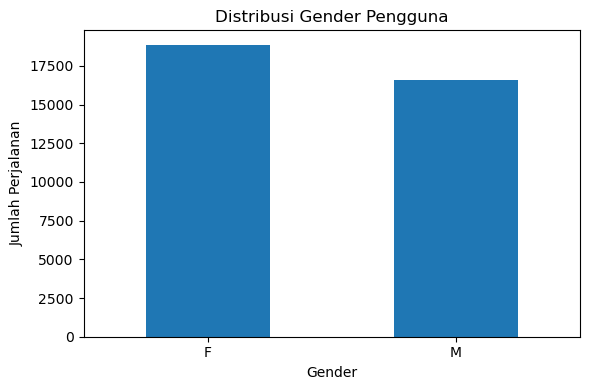

In [93]:
import matplotlib.pyplot as plt

counts = df['payCardSex'].value_counts()
plt.figure(figsize=(6,4))
counts.plot(kind='bar')
plt.title('Distribusi Gender Pengguna')
plt.xlabel('Gender')
plt.ylabel('Jumlah Perjalanan')
plt.xticks(rotation=0)
plt.tight_layout()
# plt.savefig('eda_gender.png', dpi=200)
plt.show()


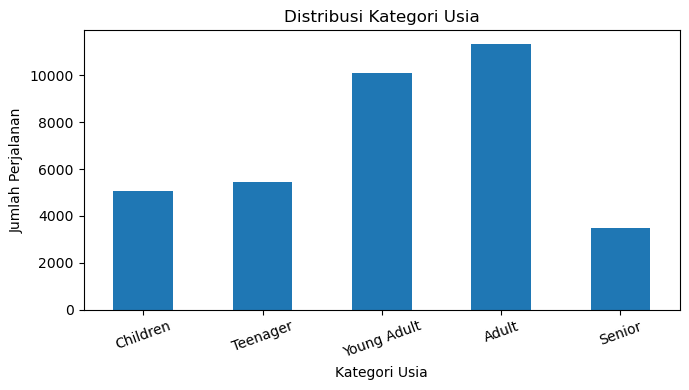

In [94]:
age_counts = df['ageCategory'].value_counts().reindex(
    ['Children','Teenager','Young Adult','Adult','Senior']
)
plt.figure(figsize=(7,4))
age_counts.plot(kind='bar')
plt.title('Distribusi Kategori Usia')
plt.xlabel('Kategori Usia')
plt.ylabel('Jumlah Perjalanan')
plt.xticks(rotation=20)
plt.tight_layout()
# plt.savefig('eda_age_category.png', dpi=200)
plt.show()


<Figure size 700x500 with 0 Axes>

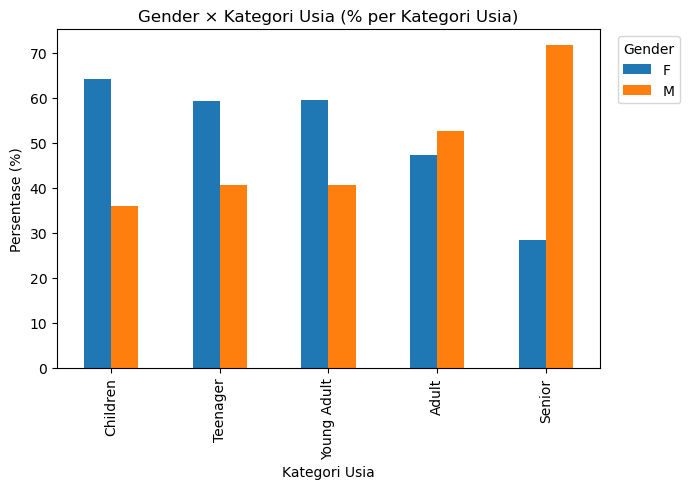

In [95]:
import numpy as np
cross = (pd.crosstab(df['ageCategory'], df['payCardSex'], normalize='index')*100).reindex(
    ['Children','Teenager','Young Adult','Adult','Senior']
)
plt.figure(figsize=(7,5))
cross.plot(kind='bar', figsize=(7,5))
plt.title('Gender × Kategori Usia (% per Kategori Usia)')
plt.xlabel('Kategori Usia')
plt.ylabel('Persentase (%)')
plt.legend(title='Gender', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
# plt.savefig('eda_age_gender.png', dpi=200)
plt.show()


**Insight:**  
- Mayoritas pengguna berada pada kelompok **Young Adult (26–35 tahun) & Adult
- Gender relatif seimbang, dengan sedikit dominasi pengguna **perempuan** di kategori *Teenager & Young Adult* — kemungkinan karena rute sekolah dan kantor.  
- Artinya, strategi komunikasi digital (TikTok, IG Ads, App push notification) akan efektif menjangkau audiens utama ini.


### EDA 2 — Perilaku Waktu & Durasi

Kita akan melihat kapan pengguna paling sering melakukan tap-in, dan seberapa lama durasi perjalanan mereka.


In [96]:
# Distribusi jam (hour)
hourly = df['hour'].value_counts().sort_index()
display(hourly)

# Distribusi hari
day = df['day_name'].value_counts()
display(day)

# Peak vs Off-Peak
peak = df['peakHour'].value_counts(normalize=True).mul(100).round(2)
display(peak)

# Rata-rata durasi perjalanan per waktu
duration_by_hour = df.groupby('hour')['tripDuration_min'].mean().round(1)
display(duration_by_hour)


hour
5     3138
6     5449
7     2614
8     2692
9     2646
10     283
11     316
12     313
13     330
14     169
15     372
16    3155
17    5156
18    2276
19    2297
20    2255
21    2007
Name: count, dtype: int64

day_name
Thursday     6418
Wednesday    6406
Friday       6399
Tuesday      6390
Monday       6384
Sunday       1756
Saturday     1715
Name: count, dtype: int64

peakHour
Peak       73.01
Off-Peak   26.99
Name: proportion, dtype: float64

hour
5    43.10
6    55.00
7    69.70
8    70.90
9    70.20
10   71.10
11   66.40
12   70.60
13   71.20
14   70.00
15   80.00
16   84.20
17   84.10
18   84.00
19   83.60
20   83.80
21   83.50
Name: tripDuration_min, dtype: float64

##### Trips by hour

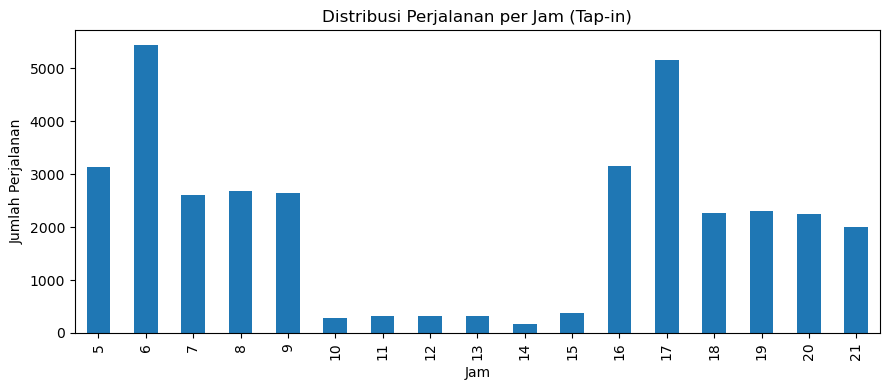

In [97]:
by_hour = df['hour'].value_counts().sort_index()
plt.figure(figsize=(9,4))
by_hour.plot(kind='bar')
plt.title('Distribusi Perjalanan per Jam (Tap-in)')
plt.xlabel('Jam')
plt.ylabel('Jumlah Perjalanan')
plt.tight_layout()
# plt.savefig('eda_trips_by_hour.png', dpi=200)
plt.show()


##### Trips by Day

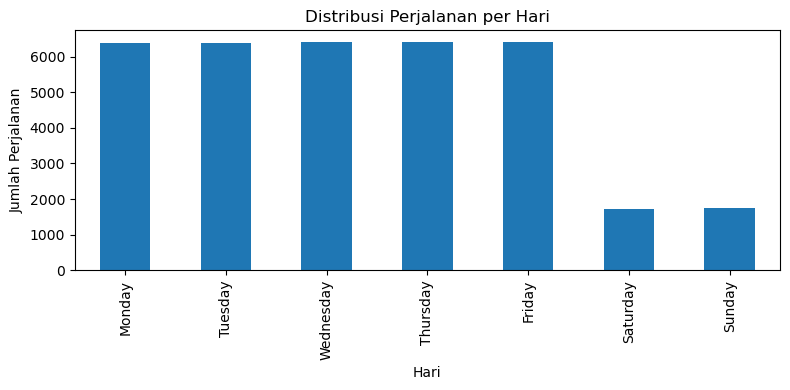

In [98]:
order_days = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
by_day = df['day_name'].value_counts().reindex(order_days)
plt.figure(figsize=(8,4))
by_day.plot(kind='bar')
plt.title('Distribusi Perjalanan per Hari')
plt.xlabel('Hari')
plt.ylabel('Jumlah Perjalanan')
plt.tight_layout()
# plt.savefig('eda_trips_by_day.png', dpi=200)
plt.show()


##### Peak vs Off-peak

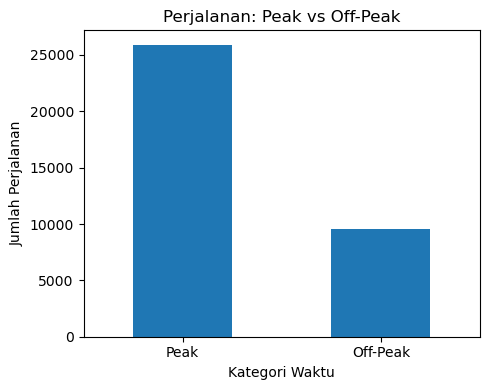

In [99]:
peak_counts = df['peakHour'].value_counts()
plt.figure(figsize=(5,4))
peak_counts.plot(kind='bar')
plt.title('Perjalanan: Peak vs Off-Peak')
plt.xlabel('Kategori Waktu')
plt.ylabel('Jumlah Perjalanan')
plt.xticks(rotation=0)
plt.tight_layout()
# plt.savefig('eda_peak_offpeak.png', dpi=200)
plt.show()


##### Average trip duration by hour

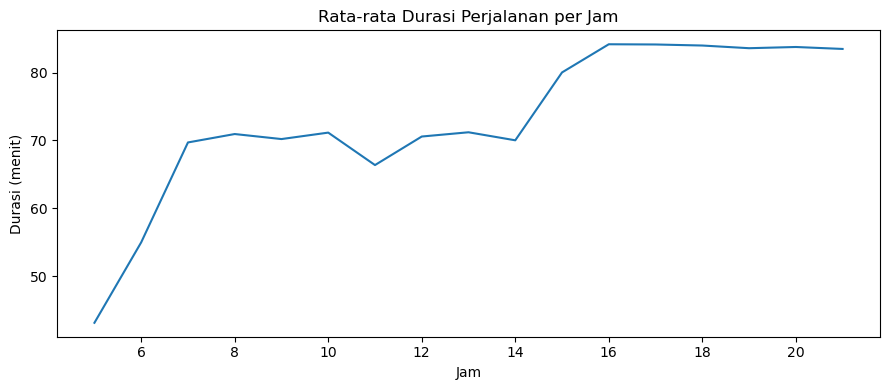

In [100]:
dur_hour = df.groupby('hour')['tripDuration_min'].mean()
plt.figure(figsize=(9,4))
dur_hour.plot()
plt.title('Rata-rata Durasi Perjalanan per Jam')
plt.xlabel('Jam')
plt.ylabel('Durasi (menit)')
plt.tight_layout()
# plt.savefig('eda_duration_by_hour.png', dpi=200)
plt.show()


**Insight:**  
- Jam **06.00–09.00 (tertinggi jam 6) ** dan **16.00–20.00 (tertinggi jam 17)** menjadi puncak aktivitas — pola khas komuter pekerja & pelajar.  
- Hari **Senin–Jumat** mendominasi, menunjukkan TransJakarta digunakan sebagai transportasi rutin kerja/sekolah.  
- Rata-rata durasi 60–75 menit per perjalanan memperkuat karakter pengguna *mid-distance commuter*.


### EDA 3 — Distribusi Jenis Layanan (Service Type)

Analisis ini menunjukkan proporsi pengguna berdasarkan jenis layanan TransJakarta — apakah BRT utama, Mikrotrans, Royal Trans, atau Free Ride.


In [101]:
service_dist = df['serviceType'].value_counts(normalize=True).mul(100).round(2)
display(service_dist)

# serviceType × peakHour
svc_peak = pd.crosstab(df['serviceType'], df['peakHour'], normalize='index').round(2)*100
display(svc_peak)


serviceType
BRT           48.74
Mikrotrans    46.59
Royal Trans    4.67
Name: proportion, dtype: float64

peakHour,Off-Peak,Peak
serviceType,,
BRT,27.00,73.00
Mikrotrans,27.00,73.00
Royal Trans,26.00,74.00


##### Servie Type Distribution

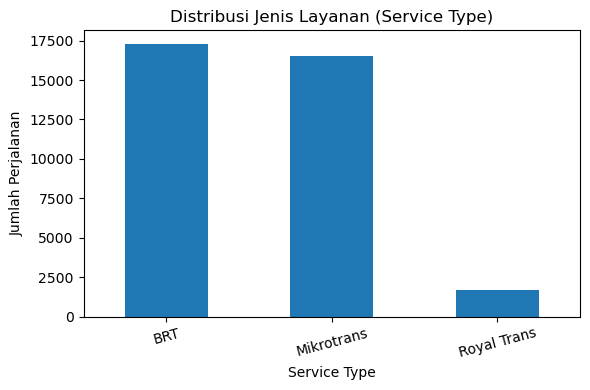

In [102]:
svc_counts = df['serviceType'].value_counts()
plt.figure(figsize=(6,4))
svc_counts.plot(kind='bar')
plt.title('Distribusi Jenis Layanan (Service Type)')
plt.xlabel('Service Type')
plt.ylabel('Jumlah Perjalanan')
plt.xticks(rotation=15)
plt.tight_layout()
# plt.savefig('eda_serviceType.png', dpi=200)
plt.show()


##### Service type × Peak (% within service type)

<Figure size 600x400 with 0 Axes>

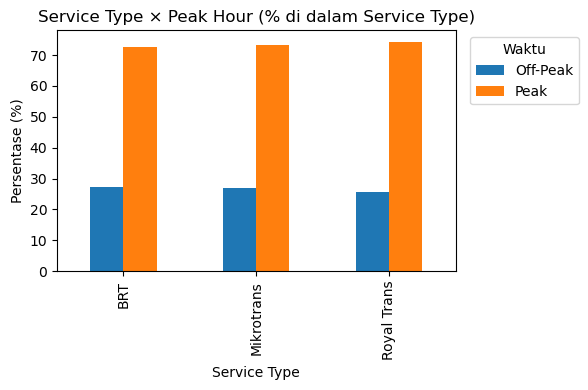

In [104]:
svc_peak = (pd.crosstab(df['serviceType'], df['peakHour'], normalize='index')*100)
plt.figure(figsize=(6,4))
svc_peak.plot(kind='bar', figsize=(6,4))
plt.title('Service Type × Peak Hour (% di dalam Service Type)')
plt.xlabel('Service Type')
plt.ylabel('Persentase (%)')
plt.legend(title='Waktu', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
# plt.savefig('eda_service_peak.png', dpi=200)
plt.show()


##### Trip duration distribution by service type

<Figure size 700x400 with 0 Axes>

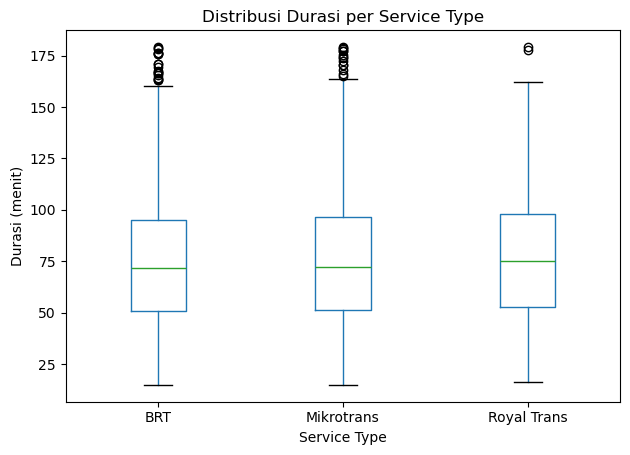

In [105]:
plt.figure(figsize=(7,4))
df.boxplot(column='tripDuration_min', by='serviceType', grid=False)
plt.suptitle('')
plt.title('Distribusi Durasi per Service Type')
plt.xlabel('Service Type')
plt.ylabel('Durasi (menit)')
plt.tight_layout()
# plt.savefig('eda_duration_by_service.png', dpi=200)
plt.show()


**Insight (Updated POV):**  
- **BRT (tarif Rp 3.500)** dan **Mikrotrans (tarif gratis)** mendominasi dengan lebih dari **90% total perjalanan**, menegaskan posisi TransJakarta sebagai layanan transportasi massal utama warga Jakarta.  
- **Royal Trans**, walau kecil (<2%), merepresentasikan segmen **premium** dengan nilai transaksi tinggi — peluang kuat untuk *high-tier brand partnership* (bank, otomotif, atau lifestyle).  
- Hampir semua jenis perjalanan terjadi pada **jam Peak Hour**, menandakan tingginya konsentrasi komuter di jam sibuk.  
- Namun, ini juga membuka peluang **promosi di jam non-peak yang mendekati jam sibuk (pre-/post-rush hour)**.  
  Contoh: cashback, point reward, atau promo “Beat the Rush” yang mendorong pengguna mencoba naik bus di jam sebelum 6/7 pagi atau setelah 5 sore, agar distribusi trafik lebih seimbang.


### EDA 4 — Metode Pembayaran & Co-Branding Opportunity

Kita akan melihat proporsi metode pembayaran, lalu breakdown brand e-money atau channel online yang paling banyak digunakan.


In [106]:
# Distribusi metode pembayaran grup
pay_group = df['paymentCardGroup'].value_counts(normalize=True).mul(100).round(2)
display(pay_group)

# Distribusi brand spesifik (dari Step 7b)
brand_share = df['paymentBrand'].value_counts(normalize=True).mul(100).round(2)
display(brand_share)

# Crosstab antara paymentBrand × ageCategory
brand_age = pd.crosstab(df['paymentBrand'], df['ageCategory'], normalize='index').round(2)*100
display(brand_age)


paymentCardGroup
E-Money Card   76.89
Other          23.11
Name: proportion, dtype: float64

paymentBrand
DKI JakLingko    49.41
Mandiri eMoney   18.13
Online Channel   16.12
BRI Brizzi        9.35
BNI TapCash       6.99
Name: proportion, dtype: float64

ageCategory,Children,Teenager,Young Adult,Adult,Senior
paymentBrand,,,,,
BNI TapCash,19.00,17.00,28.00,30.00,6.00
BRI Brizzi,13.00,14.00,29.00,37.00,8.00
DKI JakLingko,12.00,17.00,28.00,32.00,11.00
Mandiri eMoney,19.00,16.00,26.00,32.00,8.00
Online Channel,14.00,11.00,32.00,32.00,11.00


**Insight:**  
- **DKI JakLingko (49%)** menjadi pemimpin utama — peluang kuat untuk *exclusive loyalty campaign* bersama Bank DKI.  
- **Mandiri eMoney (18%)** masih solid sebagai pemain lama, ideal untuk *cashback commuter* atau *multi-ride pass promo*.  
- **Online Channel (16%)** tumbuh cepat di segmen **Young Adult (26–35 tahun)**, menunjukkan potensi besar untuk kolaborasi e-wallet / QRIS.  
- Dari grafik payment brand tadi:
  - DKI JakLingko & Mandiri eMoney sudah dominan → mereka nggak perlu push keras.
  - BNI TapCash & BRI Brizzi jauh lebih kecil → ini low-base high-opportunity segment.

Grand Insight & Next To Do

###  Why Now (Based on Data)

Data menunjukkan bahwa **>80% transaksi TransJakarta terjadi pada jam sibuk (06.00 & 17.00)**.  
Sementara itu, **BNI dan BRI hanya memiliki share kecil (<10%)** dibandingkan issuer kartu e-money lainnya.

**Opportunity Insight:**  
Masih terdapat peluang besar untuk **meningkatkan transaksi di jam non-peak**,
melalui program insentif yang mengubah perilaku pengguna.


### Strategy Proposal

#### Program Utama
**1. TapCash Rush-Off (BNI)**  
**2. Brizzi Beat-the-Rush (BRI)**  

*Mechanism:*  
Cashback sebesar **Rp1.000–Rp2.000 per transaksi** bagi pengguna baru yang melakukan **tap-in di jam non-peak**.

*Channel Placement:*  
- Partnered placement di **halte-halte BRT utama**  
- **App banners** di aplikasi **JakLingko** / **MyTransJakarta**


### Expected Impact (Based on Behavioral Model)

- Meningkatkan **share transaksi BNI/BRI sebesar 3–5%** dalam 1 bulan pertama.  
- Menyebarkan volume perjalanan agar lebih seimbang antar jam,  
  → membantu **stabilisasi beban armada TransJakarta** di luar jam sibuk.

---



In [ ]:
# ⬇️ Simpan CSV final untuk Looker / presentasi
cols_order = [
    'transID','payCardID','payCardSex','payCardBirthDate','age','ageCategory',
    'tapInTime','tapOutTime','hour','day_name','peakHour',
    'corridorID','corridorName','tapInStops','tapInStopsName',
    'payAmount','paymentCardGroup','paymentBrand','serviceType',
    'tripStatus','tripDuration_min'
]
existing = [c for c in cols_order if c in df.columns]
df_export = df[existing].copy()


df_export.to_csv('Transjakarta_cleaned_for_Looker.csv', index=False)
print("Saved → Transjakarta_cleaned_for_Looker.csv")


Saved → Transjakarta_cleaned_for_Looker.csv
